<img align="center" src="http://sydney.edu.au/images/content/about/logo-mono.jpg">
<h1 align="center" style="margin-top:10px">Statistical Learning with Python</h1>
<h2 align="center" style="margin-top:20px">Lecture 2: Two Simple Methods for Prediction</h2>
<br>

This notebook shows how you can use the k-Nearest Neighbours method in Python. We also use this method to discuss and illustrate important concepts such as overfitting. 

<a href="#1.-Credit-Card-Data">Credit Card Data</a> <br>
<a href="#2.-K-Nearest-Neighbours">K-Nearest Neighbours</a> <br>
<a href="#3.-Model-Evaluation">Model Evaluation</a> <br>
<a href="#4.-Adding-Predictors">Adding Predictors</a> <br>
<a href="#5.-Exercises">Exercises</a> <br>

This notebook relies on the following imports and settings. We will load new functions and libraries in context to make clear what we are using them for. 

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
# this is to clear the warnings from this page, usually we should leave this on

In [2]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(crayon) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

### 1. Credit Card Data

In this lesson we continue working with the `Credit` dataset. At the end of the previous notebook, we save the training and test dataframes into a single HDF5 file. We now use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_hdf.html" target="_blank"><TT>read_hdf</TT></a> function to load them back into the memory.

In [3]:
# We will always assume that the data file is in a subdirectory called "Data"
train=pd.read_hdf('Data/Credit.h5', 'train')
test=pd.read_hdf('Data/Credit.h5', 'test')
train.head(10) 

,Income,Limit,Cards,Age,Education,Student,Married,Balance,Male,Caucasian,Asian
Obs,,,,,,,,,,,
400,18.701,5524,5,64,7,0,0,966,0,0,1
26,14.090,4323,5,25,16,0,1,671,0,0,0
280,54.319,3063,3,59,8,1,0,269,0,1,0
261,67.937,5184,4,63,12,0,1,345,1,0,1
131,23.793,3821,4,56,12,1,1,868,0,0,0
381,115.123,7760,3,83,14,0,0,661,0,0,0
361,53.566,5891,4,82,10,0,0,712,0,1,0
21,17.700,2860,4,63,16,0,0,89,0,0,1
193,28.508,3933,4,56,14,0,1,336,1,0,1


This part is very similar to the last notebook, except that we intially consider only one predictor, the credit card limit, for illustrative purposes.

In [4]:
# Response label
response = 'Balance'

# Creates a list with the names of all variables which are not the respose
predictors = ['Limit',] 

# Here we convert the data to NumPy arrays. This is not strictly necessary, but generally better.
y_train = train[response].to_numpy() 
X_train = train[predictors].to_numpy() 

y_test = test[response].to_numpy()
X_test = test[predictors].to_numpy() 

##2. K-Nearest Neighbours

In the last lesson, we fitted a linear regression using the credit card limit as the single input as follows.

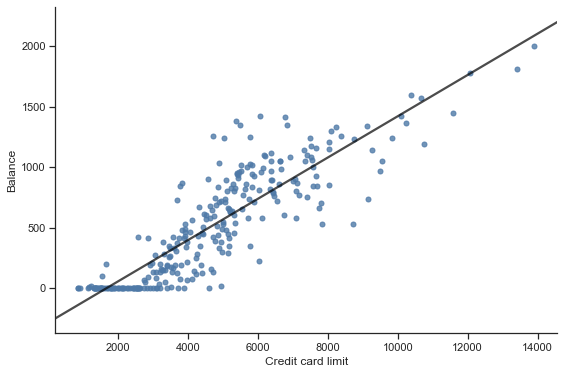

In [5]:
fig, ax = plt.subplots()
sns.regplot(train['Limit'], train['Balance'], ci=None, scatter_kws={'s':25}, 
            line_kws={'color':'black', 'alpha':0.7})
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
sns.despine()
plt.show()

This figure suggests that the linear regression model may not be satisfactory for this data since the relationship between limit and balance appears to be nonlinear. The <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html" target="_blank"><TT>K-Nearest Neighbours</TT></a> (KNN) method is a flexible algorithm that can approximate complex relationships between the response and predictors without assuming a particular form for the regression function.
    
Using the kNN method with Scikit-Learn follows the template from above. Unlike in the linear regression model, however, we need to specify a hyperparameter (the number of neighbours) when instantiating the model. 

In [6]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10) # we shoudl specify the number of neighbours
knn.fit(X_train, y_train)
knn.predict(np.array([[5000]]))

array([566.2])

Let's visualise the relationship learned by kNN algorithm using k=10 neighbours. 

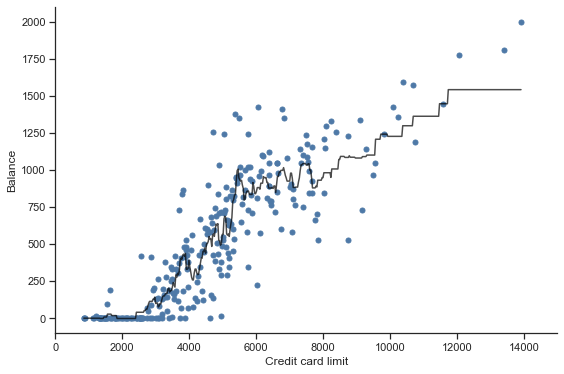

In [7]:
# Generate a grid of 500 values ranging from the minimum to the maximum value of the variable 
# in the training data
x = np.linspace(train['Limit'].min(),train['Limit'].max(), 500).reshape((-1,1))

# Compute the predicted values for each of these input points
y_pred = knn.predict(x)

# Plot figure
fig, ax = plt.subplots()
ax.scatter(X_train, y_train, s=25) # the s option is the size of the dot
ax.set_xlabel('Credit card limit')
ax.set_ylabel('Balance')
ax.set_xlim(0, 15000)
ax.plot(x, y_pred, color='black', alpha = 0.7)
sns.despine()
plt.show()

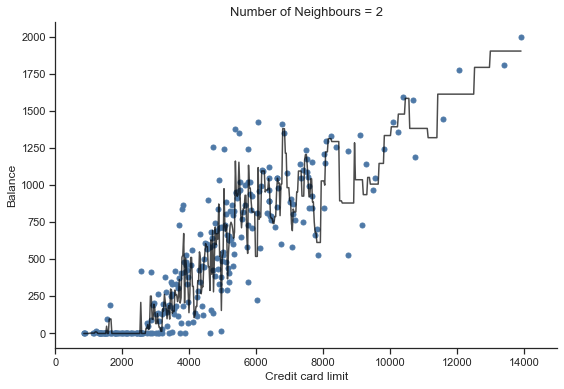

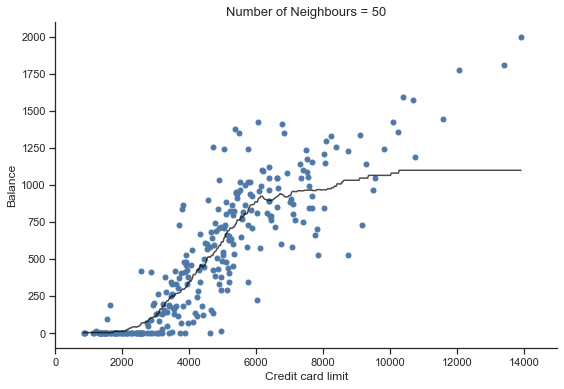

In [8]:
for k in [2, 50]:
    
    # Specify and fit model
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(X_train, y_train)

    # Compute the predicted values for each point in the grid
    y_pred = knn.predict(x)

    # Plot figuer
    fig, ax = plt.subplots()
    ax.scatter(X_train, y_train, s=25) 
    ax.set_title(f'Number of Neighbours = {k}', fontsize=13)
    ax.set_xlabel('Credit card limit')
    ax.set_ylabel('Balance')
    ax.set_xlim(0, 15000)
    ax.plot(x, y_pred, color='black', alpha = 0.7)
    sns.despine()
    plt.show()

### 3. Model evaluation

How does the test performance of k-Nearest Neighbours compare to the linear regression algorithm? First, let's fit the two models, where for now we arbitrarily set the number of neighbours to ten. 

In [9]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression()
ols.fit(X_train, y_train)

knn = KNeighborsRegressor(n_neighbors=10) 
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

The test results are as follows. We find that the kNN performs a little better than linear regression in the current setting. 

In [10]:
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

# Initialise table
columns=['RMSE', 'R-Squared', 'MAE']
rows=['Linear Regression', 'kNN']
results =pd.DataFrame(0.0, columns=columns, index=rows)

# List algorithms
methods = [ols, knn] 

# Computer test predictions and metrics
for i, method in enumerate(methods):
    y_pred = method.predict(X_test)
    results.iloc[i, 0] = np.sqrt(mean_squared_error(y_test, y_pred))
    results.iloc[i, 1] = r2_score(y_test, y_pred)
    results.iloc[i, 2] = mean_absolute_error(y_test, y_pred)

results.round(2)

,RMSE,R-Squared,MAE
Linear Regression,254.82,0.70,197.13
kNN,242.14,0.73,169.89


### 4. Adding Predictors

Now, let's add another predictor to the analysis and see how the results change. 

In [11]:
predictors = ['Limit', 'Income'] 
X_train = train[predictors].to_numpy() 
X_test = test[predictors].to_numpy()

The Euclidean distance metric for the k-Nearest Neighbours method only makes sense if the predictors are on the same scale. We therefore standardise the input variables as follows.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

We consider the Mahalanobis distance in addition to the Euclidean distance. The algorithms that fit therefore are the linear regression method and the two variations of the k-nearest neighbours algorithm.

In [13]:
ols = LinearRegression()
ols.fit(X_train, y_train)

knn1 = KNeighborsRegressor(n_neighbors = 10)
knn1.fit(X_train, y_train)

knn2 = KNeighborsRegressor(n_neighbors = 10, metric='mahalanobis', 
                           metric_params={'V': np.cov(X_train, rowvar=False)})
knn2.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='mahalanobis',
          metric_params={'V': array([[1.00358, 0.8001 ],
       [0.8001 , 1.00358]])},
          n_jobs=None, n_neighbors=10, p=2, weights='uniform')

We conduct model evaluation in the same way as before. We find that the k-nearest neighbours method with the Mahalanobis distance metric performs the best. 

In [14]:
# Initialise table
columns=['RMSE', 'R-Squared', 'MAE']
rows=['Linear Regression', 'kNN (Euclidean)', 'kNN (Mahalanobis)']
results =pd.DataFrame(0.0, columns=columns, index=rows)

# List algorithms
methods = [ols, knn1, knn2] 

# Computer test predictions and metrics
for i, method in enumerate(methods):
    y_pred = method.predict(X_test)
    results.iloc[i, 0] = np.sqrt(mean_squared_error(y_test, y_pred))
    results.iloc[i, 1] = r2_score(y_test, y_pred)
    results.iloc[i, 2] = mean_absolute_error(y_test, y_pred)

results.round(2)

,RMSE,R-Squared,MAE
Linear Regression,182.45,0.84,135.65
kNN (Euclidean),184.20,0.84,120.85
kNN (Mahalanobis),174.92,0.86,109.44


Of course, our analysis still has important limitations. So far, we have chosen the number of neighbours and the predictor variables arbitrarily, and made no attempt to identify the most promising algorithm using the training data (we just evaluated the performance of different methods). We'll address these steps in the next two lessons. 

### 5. Exercises

(a) Complete the following code to generate a plot of the test performance for the kNN model as we change the number of neighbours.

In [ ]:
ks = np.arange(1, 101)

rmses = []
for k in ks: 
    # 1. Specify and fit the model on the training data (there is no need to store it)
    # 2. Compute predictions for the test data
    # 3. Compute the root mean squared error and assign to a variable called rmse
    rmses.append(rmse)
    
fig, ax= plt.subplots()
ax.plot(values, rmses)
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Test RMSE')
plt.show()

The following code will give you the value of $k$ with lowest test error (why?).

In [ ]:
1 + np.argmin(rmses)

(b) Fit and evaluate the kNN regression model with different numbers of predictors. What do you find? 

In [16]:
# This cells formats the notebook for display online.  Please omit it from your work.  
from IPython.core.display import HTML
style = open('jstyle.css', "r").read()
HTML('<style>'+ style +'</style>')